# Precios de auto

Se tiene una base de datos de publicaciones online de autos. Esta es obtenida mediante un scrapeo de un sitio web de venta de autos y luego es procesada para ordenarlos e intentar eliminar registros erróneos. Se le entrega el resultado en el archivo “autos.csv”.

- Utilice el archivo adjunto “autos.csv” para predecir el precio de un vehículo y analice el resultado de sus predicciones. Utilice gráficos para los análisis pre y post predicciones si le es útil. Justifique toda decisión que tome que no le parezca obvia.


- ***Nota: haga todas las asunciones que considere razonables y necesarias y explique el porqué de esta. Estaremos midiendo su capacidad de razonamiento y argumentativa más que si la respuesta es correcta***


In [108]:
import pandas as pd
import numpy as np 
import numpy as np
import pandas as pd



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ridge_regression
from sklearn.tree import DecisionTreeRegressor


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import  MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from xgboost import XGBRegressor


import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import set_config
set_config(display="diagram")




In [109]:
df=pd.read_csv("autos.csv")

In [110]:
forma_incial=df.shape[0]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make_id            19999 non-null  object 
 1   model_id           19998 non-null  float64
 2   year               19999 non-null  int64  
 3   cylinder_capacity  14757 non-null  float64
 4   km                 19999 non-null  int64  
 5   color              3438 non-null   object 
 6   region             19977 non-null  object 
 7   price              19999 non-null  int64  
 8   fuel_type_id       19980 non-null  object 
 9   transmission_id    19998 non-null  object 
 10  traction_id        10771 non-null  float64
 11  age                19999 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.8+ MB


In [112]:
df.isna().sum()

make_id                  0
model_id                 1
year                     0
cylinder_capacity     5242
km                       0
color                16561
region                  22
price                    0
fuel_type_id            19
transmission_id          1
traction_id           9228
age                      0
dtype: int64

In [113]:
df[df.isnull().any(axis=1)]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
1,64,780.0,2010,1600.0,165900,NaN,X Los Lagos,3500000,0,0,NaN,14
2,63,756.0,2018,1500.0,92718,Blanco,Araucanía,9290000,0,0,NaN,6
3,67,5905.0,2018,2500.0,66000,NaN,Región Metropolitana,8500000,1,0,0.0,6
4,11,169.0,2014,2500.0,81000,NaN,Región Metropolitana,9390000,1,0,NaN,10
5,47,615.0,2018,1800.0,95000,NaN,Valparaíso,9500000,0,1,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
19994,63,763.0,2023,NaN,24179,NaN,Metropolitana de Santiago,19590000,0,1,NaN,1
19995,11,172.0,2011,1600.0,147000,NaN,VIII Biobío,-1,0,0,NaN,13
19996,11,176.0,2012,2400.0,86000,NaN,Valparaíso,7800000,0,0,1.0,12
19997,11,1693.0,2020,NaN,34233,NaN,Valparaíso,7180000,0,0,NaN,4


2. Eliminando Nulos Opciones
    - "Eliminar filas"
    - "Eliminar Columna 'Problematica"
    - Imputar con mas frecuente 
    - Imputar con ML

In [114]:
df['make_id'].unique()

array(['49', '64', '63', '67', '11', '47', '61', '20', '33', '6', '43',
       '23', '40', '26', '45', '209', '13', '19', '30', '31', '27', '10',
       '32', '65', '36', '4', '29', '59', '42', '50', '202', '60', '16',
       '48', '57', '53', '52', '73', '7', '112', '56', '17', '44', '21',
       '38', '55', '9', '77', '22', '34', '210', '35', '72', '24', '28',
       '211', '215', '12', '1', '8', '14', '87', '39', '216', '15', '78',
       '76', '62', '18', '92', ' chevrolet suburban lt 2021 &#128654',
       '66', '51', '213', '83', '70', '214', '168'], dtype=object)

In [115]:
df[df['make_id']==' chevrolet suburban lt 2021 &#128654']

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
5377,chevrolet suburban lt 2021 &#128654,NaN,11,152.0,2021,13000,2024-01-17 09:55:00.317,40917734,2024-01-24 03:37:05.000,2024-01-21 20:01:29.000,0.0,2


No se sabe que id correponde chevrolet ni suburban por lo tanto se elemina esta fila

In [116]:
df = df.dropna(subset=['model_id'])

In [117]:
df.isna().sum()

make_id                  0
model_id                 0
year                     0
cylinder_capacity     5242
km                       0
color                16561
region                  22
price                    0
fuel_type_id            19
transmission_id          1
traction_id           9228
age                      0
dtype: int64

cylinder_capacity

In [118]:
df['cylinder_capacity'].describe()

count    14756.000000
mean      2076.850095
std       1116.712996
min          0.000000
25%       1500.000000
50%       1800.000000
75%       2400.000000
max      24000.000000
Name: cylinder_capacity, dtype: float64

In [119]:
df['cylinder_capacity'].max()

24000.0

Esto esta bien ? , existen autos con cilindrada de 24.000 ? . Segun yo no esta cilindradra ni un camion minero la tiene , por lo tanto este valor debe estar malo y se eliminar esta fila 

In [120]:
df[df['cylinder_capacity'] > 10000]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
7836,45,602.0,2021,24000.0,80000,NaN,Región Metropolitana,16980000,1,0,0.0,3


In [121]:
df=df.drop(df[df['cylinder_capacity'] > 10000].index)

<Axes: xlabel='cylinder_capacity', ylabel='Count'>

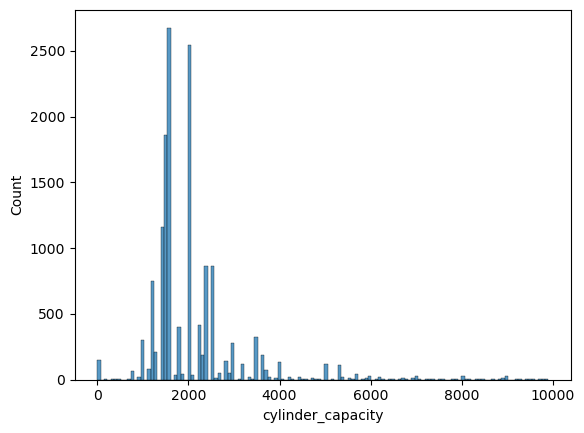

In [122]:
sns.histplot(df['cylinder_capacity'])

In [123]:
prom=df['cylinder_capacity'].mean()
moda=df['cylinder_capacity'].mode()
mediana=df['cylinder_capacity'].median()

In [124]:
print(prom)
print(moda)
print(mediana)

2075.3642832937985
0    1600.0
Name: cylinder_capacity, dtype: float64
1800.0


In [125]:

df[df['cylinder_capacity'].isnull()]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
8,49,657.0,3008,NaN,87397,NaN,Metropolitana de Santiago,14990000,1,0,NaN,-984
9,11,163.0,1989,NaN,458000,NaN,Valparaíso,2000000,0,0,NaN,35
11,6,74.0,2023,NaN,11266,NaN,Metropolitana de Santiago,66900000,0,1,NaN,1
15,40,475.0,2016,NaN,198000,NaN,IX Araucanía,12900000,1,0,NaN,8
17,45,598.0,2017,NaN,83000000,NaN,Valparaíso,11990000,0,0,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...
19986,20,293.0,2020,NaN,68104,NaN,Metropolitana de Santiago,32390000,0,1,1.0,4
19987,64,774.0,2018,NaN,45500,Gris,Metropolitana de Santiago,14990000,0,1,NaN,6
19994,63,763.0,2023,NaN,24179,NaN,Metropolitana de Santiago,19590000,0,1,NaN,1
19997,11,1693.0,2020,NaN,34233,NaN,Valparaíso,7180000,0,0,NaN,4


In [126]:
df['cylinder_capacity'].fillna(df['cylinder_capacity'].median(),inplace=True)


<Axes: xlabel='cylinder_capacity', ylabel='Count'>

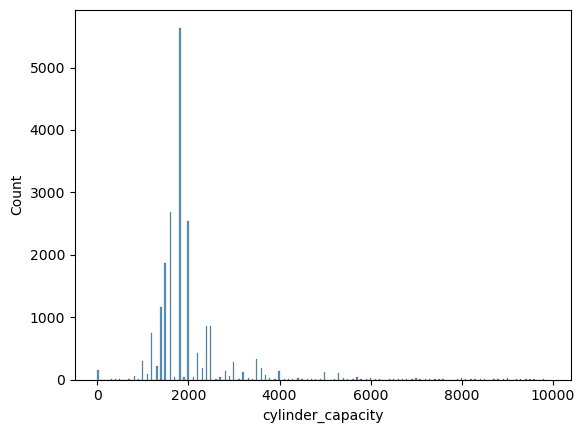

In [127]:
sns.histplot(df['cylinder_capacity'])

color

In [128]:
df[df['color'].isna()]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
1,64,780.0,2010,1600.0,165900,NaN,X Los Lagos,3500000,0,0,NaN,14
3,67,5905.0,2018,2500.0,66000,NaN,Región Metropolitana,8500000,1,0,0.0,6
4,11,169.0,2014,2500.0,81000,NaN,Región Metropolitana,9390000,1,0,NaN,10
5,47,615.0,2018,1800.0,95000,NaN,Valparaíso,9500000,0,1,0.0,6
6,61,734.0,2020,1600.0,50000,NaN,OHiggins,12500000,0,0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19994,63,763.0,2023,1800.0,24179,NaN,Metropolitana de Santiago,19590000,0,1,NaN,1
19995,11,172.0,2011,1600.0,147000,NaN,VIII Biobío,-1,0,0,NaN,13
19996,11,176.0,2012,2400.0,86000,NaN,Valparaíso,7800000,0,0,1.0,12
19997,11,1693.0,2020,1800.0,34233,NaN,Valparaíso,7180000,0,0,NaN,4


In [129]:
df['color'].fillna('Desconocido', inplace=True)


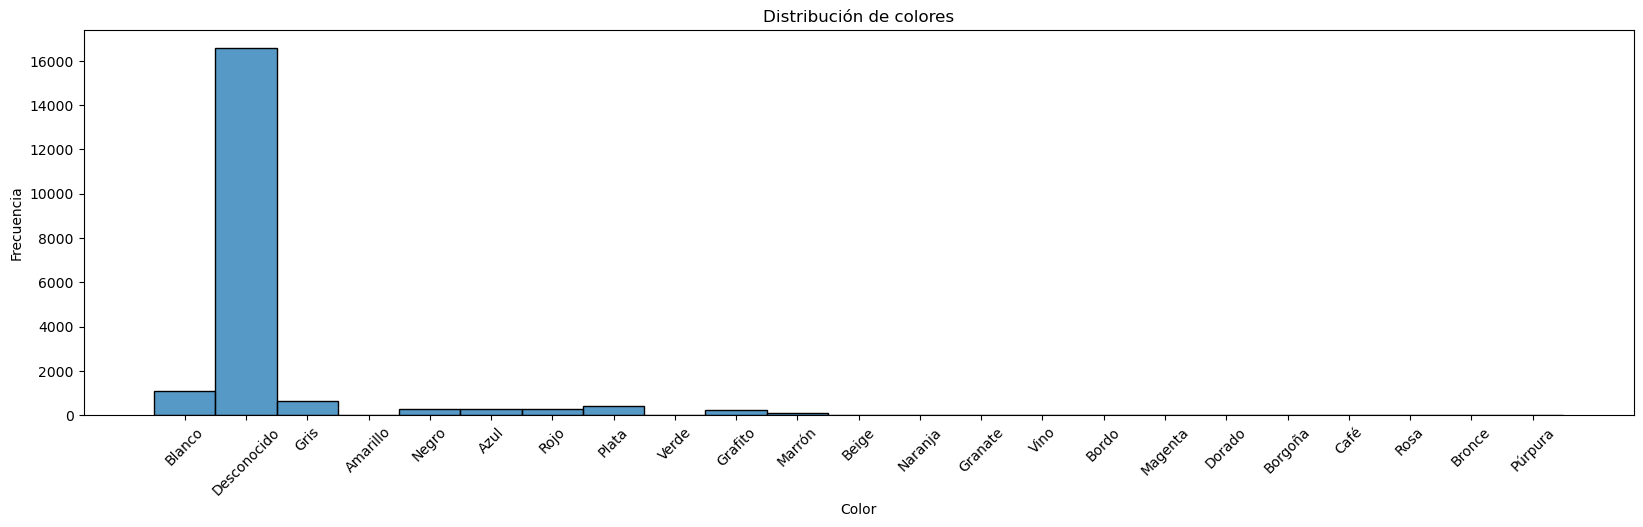

In [130]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
# Añadir etiquetas y título
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores')

sns.histplot(df['color'])
plt.show()

region

In [131]:
df[df['region'].isna()]
df['region'].fillna('Desconocido', inplace=True)


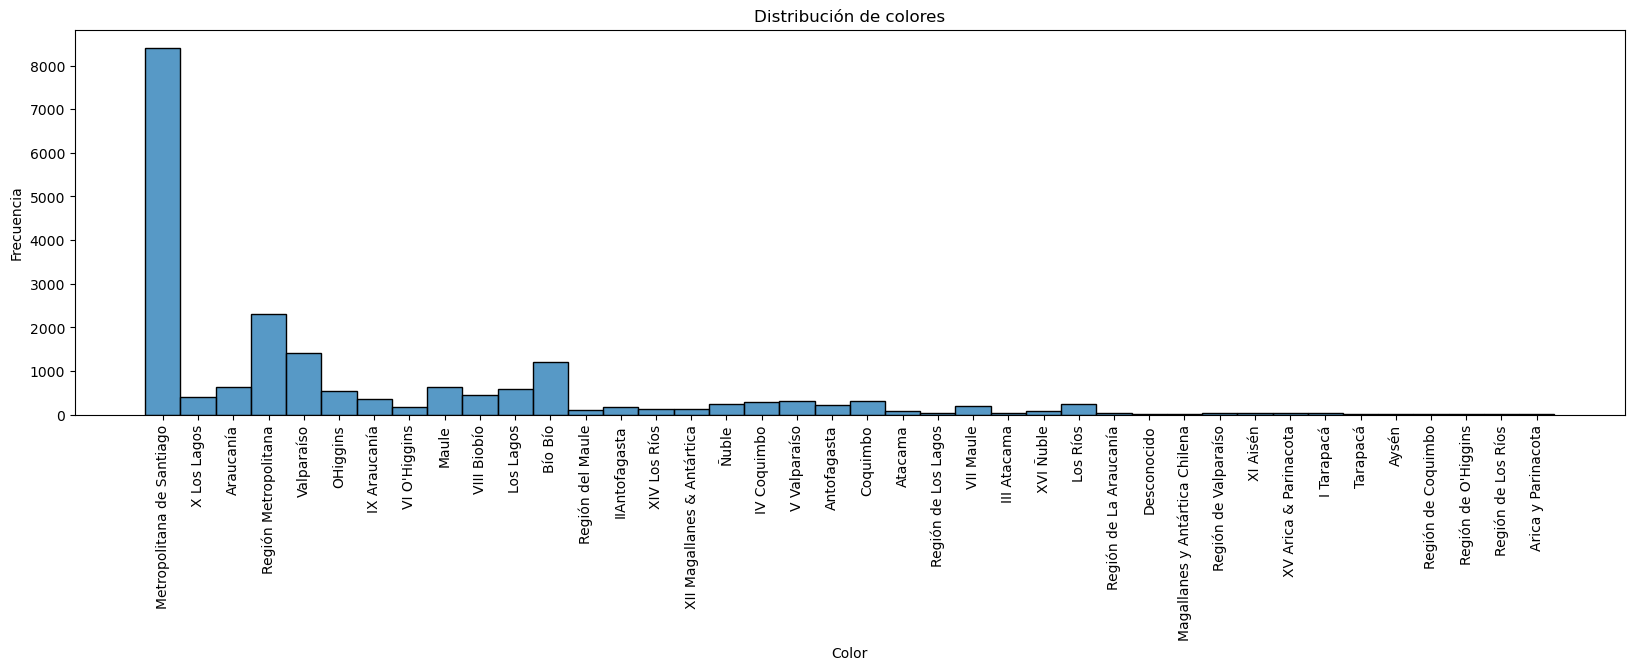

In [132]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
# Añadir etiquetas y título
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores')

sns.histplot(df['region'])
plt.show()

fuel_type_id         



-	fuel_type_id: 0: Bencina, 1: Diesel, 2: Híbrido, 3: Eléctrico




In [133]:
df[df['fuel_type_id'].isnull()]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
1263,27,5877.0,2019,1600.0,43534,Desconocido,VI O'Higgins,17590000,NaN,1,NaN,5
1702,20,284.0,2010,1800.0,190000,Desconocido,Bío Bío,7500000,NaN,1,NaN,14
2508,16,6109.0,2013,1800.0,200000,Desconocido,Metropolitana de Santiago,20990000,NaN,1,NaN,11
3115,27,334.0,2013,1800.0,580000,Desconocido,Bío Bío,10499000,NaN,0,NaN,11
3511,33,401.0,2015,1800.0,38350,Desconocido,Bío Bío,7500000,NaN,0,NaN,9
6527,4,6023.0,2023,3300.0,12000,Desconocido,Región Metropolitana,119990000,NaN,1,NaN,1
6761,27,334.0,2018,2000.0,82000,Desconocido,Metropolitana de Santiago,12200000,NaN,0,NaN,6
6990,13,988.0,2019,1800.0,82403,Blanco,Metropolitana de Santiago,6190000,NaN,0,NaN,5
8087,27,334.0,2013,1800.0,170000,Desconocido,Atacama,7300000,NaN,0,NaN,11
8093,44,595.0,2022,0.0,21651,Desconocido,Región Metropolitana,33000000,NaN,1,NaN,2


In [134]:

df['fuel_type_id'].fillna('Desconocido', inplace=True)

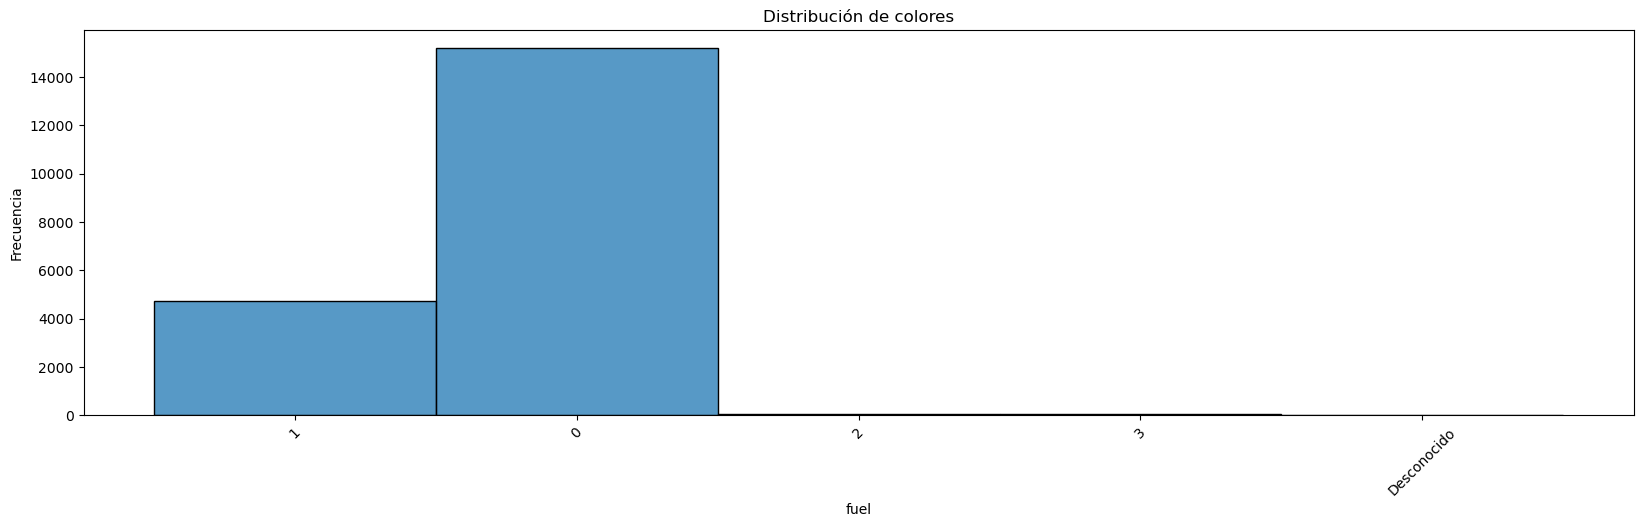

In [135]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
# Añadir etiquetas y título
plt.xlabel('fuel')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores')

sns.histplot(df['fuel_type_id'])
plt.show()

transmission_id


-	transmission_id: 0: Mecánico, 1: Automático
-    traction_id: 0: 4X2, 1: 4X4


In [136]:
df[df['transmission_id'].isna()]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
8121,40,474.0,2018,1800.0,111000,Negro,Metropolitana de Santiago,16790000,Desconocido,NaN,NaN,6


In [137]:
df['transmission_id'].fillna('Desconocido', inplace=True)

-    traction_id: 0: 4X2, 1: 4X4

In [138]:
df[df['traction_id'].isna()]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
1,64,780.0,2010,1600.0,165900,Desconocido,X Los Lagos,3500000,0,0,NaN,14
2,63,756.0,2018,1500.0,92718,Blanco,Araucanía,9290000,0,0,NaN,6
4,11,169.0,2014,2500.0,81000,Desconocido,Región Metropolitana,9390000,1,0,NaN,10
8,49,657.0,3008,1800.0,87397,Desconocido,Metropolitana de Santiago,14990000,1,0,NaN,-984
9,11,163.0,1989,1800.0,458000,Desconocido,Valparaíso,2000000,0,0,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...
19990,11,169.0,2018,2500.0,133002,Desconocido,IV Coquimbo,10990000,1,0,NaN,6
19994,63,763.0,2023,1800.0,24179,Desconocido,Metropolitana de Santiago,19590000,0,1,NaN,1
19995,11,172.0,2011,1600.0,147000,Desconocido,VIII Biobío,-1,0,0,NaN,13
19997,11,1693.0,2020,1800.0,34233,Desconocido,Valparaíso,7180000,0,0,NaN,4


In [139]:
df.traction_id.value_counts()

0.0    7378
1.0    3391
Name: traction_id, dtype: int64

In [140]:
df['traction_id'].fillna('Desconocido', inplace=True)

Estos no se pueden visualizar ahora porque necesito encodiar la variable desconocida con otra categoria numerica.

### Visualizacion Premilimnar

In [141]:
df.describe()

,model_id,year,cylinder_capacity,km,price,age
count,19997.000000,19997.000000,19997.000000,1.999700e+04,1.999700e+04,19997.000000
mean,1318.374106,2019.570536,2003.180477,1.000416e+09,9.925623e+08,4.429464
std,1809.048711,82.267741,954.370500,9.950842e+09,9.850616e+09,82.267741
min,1.000000,1000.000000,0.000000,0.000000e+00,-1.000000e+00,-2984.000000
25%,353.000000,2013.000000,1600.000000,4.500000e+04,6.800000e+06,4.000000
50%,657.000000,2017.000000,1800.000000,8.500000e+04,1.000000e+07,7.000000
75%,908.000000,2020.000000,2000.000000,1.370000e+05,1.549000e+07,11.000000
max,6217.000000,5008.000000,9900.000000,1.000000e+11,1.000000e+11,1024.000000


In [142]:
df['km'].idxmax()

43

In [143]:
df.drop(43,inplace=True)

In [144]:
df[df['km']>1000000]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
17,45,598.0,2017,1800.0,83000000,Desconocido,Valparaíso,11990000,0,0,Desconocido,7
155,7,5904.0,2021,1600.0,99999999999,Desconocido,Metropolitana de Santiago,11000000,0,0,0.0,3
231,43,5586.0,2019,1500.0,99999999999,Desconocido,V Valparaíso,8390000,0,1,Desconocido,5
255,27,350.0,2005,1800.0,99999999999,Desconocido,Maule,2650000,0,1,0.0,19
266,21,1106.0,2019,1800.0,99999999999,Desconocido,Metropolitana de Santiago,5000000,0,0,Desconocido,5
...,...,...,...,...,...,...,...,...,...,...,...,...
19207,64,781.0,2017,2000.0,99999999999,Desconocido,Metropolitana de Santiago,11800000,1,0,0.0,7
19381,19,1058.0,2017,1800.0,71000000,Desconocido,Coquimbo,6800000,0,0,Desconocido,7
19391,48,639.0,2015,1600.0,99999999999,Desconocido,Metropolitana de Santiago,11200000,0,0,0.0,9
19482,59,721.0,2015,2000.0,99999999999,Desconocido,XII Magallanes & Antártica,7500000,1,1,Desconocido,9


In [145]:
(df[df['km']>1000000].shape[0]/df.shape[0])*100


1.245249049809962

Representan 1,2 % se podrian eliminar o imputar por la mediana , se decide imputar por la mediana para no perder estos datos de igual forma se podrian haber eliminado.

In [146]:
mediana_km = df[df['km'] <= 1000000]['km'].median()

# Reemplazar los valores atípicos con la mediana de la columna 'km'
df.loc[df['km'] >= 999999, 'km'] = mediana_km

In [147]:
df.describe()

,model_id,year,cylinder_capacity,km,price,age
count,19996.000000,19996.000000,19996.000000,19996.000000,1.999600e+04,19996.000000
mean,1318.400130,2019.570614,2003.160632,96948.982647,9.926110e+08,4.429386
std,1809.090205,82.269797,954.390239,74252.580513,9.850860e+09,82.269797
min,1.000000,1000.000000,0.000000,0.000000,-1.000000e+00,-2984.000000
25%,353.000000,2013.000000,1600.000000,45000.000000,6.800000e+06,4.000000
50%,657.000000,2017.000000,1800.000000,84000.000000,1.000000e+07,7.000000
75%,908.000000,2020.000000,2000.000000,133401.000000,1.549000e+07,11.000000
max,6217.000000,5008.000000,9900.000000,970000.000000,1.000000e+11,1024.000000


In [148]:
df[df['km']>500000]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
541,11,908.0,2014,800.0,640000,Desconocido,Metropolitana de Santiago,4000000,0,0,0.0,10
660,63,762.0,2009,2500.0,594000,Desconocido,VII Maule,8000000,1,0,0.0,15
1010,33,418.0,2017,7000.0,770000,Desconocido,IX Araucanía,11000000,0,0,Desconocido,7
1470,19,272.0,2005,1300.0,777777,Desconocido,IV Coquimbo,2200000,0,0,Desconocido,19
1848,47,612.0,2008,1600.0,600000,Desconocido,Metropolitana de Santiago,3000000,0,0,0.0,16
2249,47,611.0,2007,1600.0,800000,Desconocido,Valparaíso,2000000,0,0,0.0,17
2385,27,353.0,2012,1600.0,548000,Desconocido,Los Lagos,6500000,1,0,0.0,12
2500,27,339.0,2012,2500.0,512000,Blanco,Maule,99999999999,1,0,0.0,12
2877,27,353.0,2007,1800.0,700000,Desconocido,IX Araucanía,2800000,1,0,Desconocido,17
3115,27,334.0,2013,1800.0,580000,Desconocido,Bío Bío,10499000,Desconocido,0,Desconocido,11


In [149]:
df[df['km']>133810].sort_values(by='km')

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
2740,13,213.0,2018,1600.0,133840,Desconocido,Región Metropolitana,4930000,1,0,Desconocido,6
3575,63,757.0,2013,1800.0,133900,Desconocido,Metropolitana de Santiago,5500000,0,0,Desconocido,11
2037,11,170.0,2010,1800.0,134000,Desconocido,Metropolitana de Santiago,3500000,0,0,0.0,14
13766,63,756.0,2016,1500.0,134000,Desconocido,Metropolitana de Santiago,8100000,0,1,0.0,8
5524,27,345.0,2011,1800.0,134000,Desconocido,VIII Biobío,5990000,0,0,Desconocido,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8683,11,1806.0,2017,1400.0,900000,Desconocido,Metropolitana de Santiago,5500000,0,0,0.0,7
16010,13,5653.0,2019,2000.0,920000,Desconocido,X Los Lagos,14990000,1,0,Desconocido,5
5000,27,1471.0,2018,1600.0,930000,Desconocido,Bío Bío,10500000,0,1,Desconocido,6
14486,11,158.0,2015,1400.0,950000,Desconocido,Metropolitana de Santiago,4800000,0,0,0.0,9


km

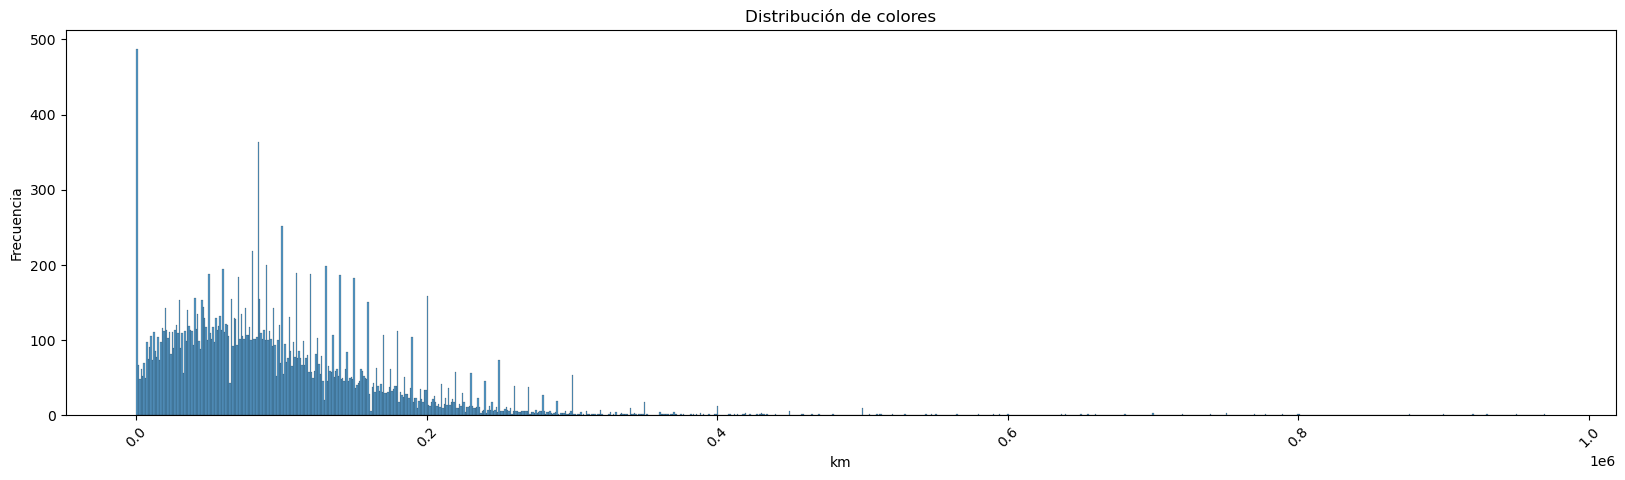

In [150]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
# Añadir etiquetas y título
plt.xlabel('km')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores')

sns.histplot(df['km'],bins=1000)
plt.show()

year

Existen casos de años que son mayores al 2024 por lo tanto estan malos y debemos arreglar estos valores para poder realizar buenas predicciones

In [151]:
df[df['year']>2024]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
8,49,657.0,3008,1800.0,87397,Desconocido,Metropolitana de Santiago,14990000,1,0,Desconocido,-984
161,49,657.0,3008,1800.0,60262,Desconocido,Metropolitana de Santiago,16990000,0,1,Desconocido,-984
720,49,657.0,3008,1800.0,88256,Desconocido,Araucanía,15990000,0,1,Desconocido,-984
1328,49,657.0,3008,1800.0,174,Azul,Metropolitana de Santiago,36500000,2,0,Desconocido,-984
1979,49,657.0,3008,1800.0,76546,Desconocido,Metropolitana de Santiago,16190000,1,1,Desconocido,-984
2945,49,657.0,3008,1800.0,76000,Desconocido,Metropolitana de Santiago,15990000,0,1,Desconocido,-984
2973,49,650.0,5008,1800.0,76030,Desconocido,Metropolitana de Santiago,18690000,1,1,Desconocido,-2984
3837,49,650.0,5008,1800.0,83087,Blanco,Metropolitana de Santiago,18590000,1,1,Desconocido,-2984
4113,49,657.0,3008,1800.0,86922,Desconocido,Metropolitana de Santiago,13490000,0,1,Desconocido,-984
4331,49,657.0,3008,1800.0,102000,Negro,Bío Bío,6990000,0,1,Desconocido,-984


Tenemos una sola marca que presenta este problema y dos modelos veamos como se comportan estos modelos antes de tomar una decision de que hacer con estas filas.

In [152]:
df[(df['make_id']=='49') & (df['model_id']==657)]['year'].value_counts(normalize=True)

3008    0.217617
2018    0.165803
2021    0.134715
2019    0.124352
2020    0.098446
2023    0.067358
2017    0.067358
2022    0.051813
2015    0.015544
2014    0.010363
2013    0.010363
2011    0.010363
2012    0.010363
2010    0.005181
2024    0.005181
2016    0.005181
Name: year, dtype: float64

In [153]:
df[(df['make_id']=='49') & (df['model_id']==657)]['year'].value_counts()

3008    42
2018    32
2021    26
2019    24
2020    19
2023    13
2017    13
2022    10
2015     3
2014     2
2013     2
2011     2
2012     2
2010     1
2024     1
2016     1
Name: year, dtype: int64

20% de los datos son 3008 de esta marca y modelo 
El problema de imputarlos es que se puede sesgar el modelo en predecir los precios de este modelo en particular algun año que no sabemos 

No tenemos como asegurar que la imputación no introduzca sesgos en los datos , por lo tanto se decide eliminar estos 

In [154]:
df[(df['make_id']=='49') & (df['model_id']==650)]['year'].value_counts(normalize=True)

2020    0.244898
5008    0.204082
2018    0.204082
2019    0.142857
2023    0.061224
2022    0.040816
2021    0.040816
2017    0.020408
2016    0.020408
2015    0.020408
Name: year, dtype: float64

In [155]:
df[(df['make_id']=='49') & (df['model_id']==650)]['year'].value_counts()

2020    12
5008    10
2018    10
2019     7
2023     3
2022     2
2021     2
2017     1
2016     1
2015     1
Name: year, dtype: int64

In [156]:
df = df.drop(df[df['year'] > 2024].index)


In [157]:
df['year'].describe()

count    19944.000000
mean      2015.990674
std         15.410534
min       1000.000000
25%       2013.000000
50%       2017.000000
75%       2020.000000
max       2024.000000
Name: year, dtype: float64

In [158]:
df[df['year']<1960]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
2419,202,5911.0,1000,1800.0,34899,Marrón,Araucanía,17990000,0,1,Desconocido,1024
3714,16,236.0,1500,1800.0,179086,Gris,Metropolitana de Santiago,15980000,0,0,Desconocido,524
4659,202,5856.0,1000,1800.0,96000,Blanco,Metropolitana de Santiago,12990000,1,0,Desconocido,1024
6608,210,206.0,1558,1800.0,35654,Rojo,Metropolitana de Santiago,17990000,0,0,Desconocido,466
7639,202,5645.0,1500,1800.0,50000,Desconocido,Maule,48990000,0,1,Desconocido,524
15173,63,756.0,1900,1800.0,213,Desconocido,VIII Biobío,5500000,0,0,Desconocido,124
15214,202,5856.0,1000,1800.0,7600,Desconocido,Maule,15490000,1,0,Desconocido,1024
16740,16,236.0,1500,1800.0,116148,Desconocido,Metropolitana de Santiago,19590000,0,1,1.0,524


In [159]:
df = df.drop(df[df['year'] < 1960].index)


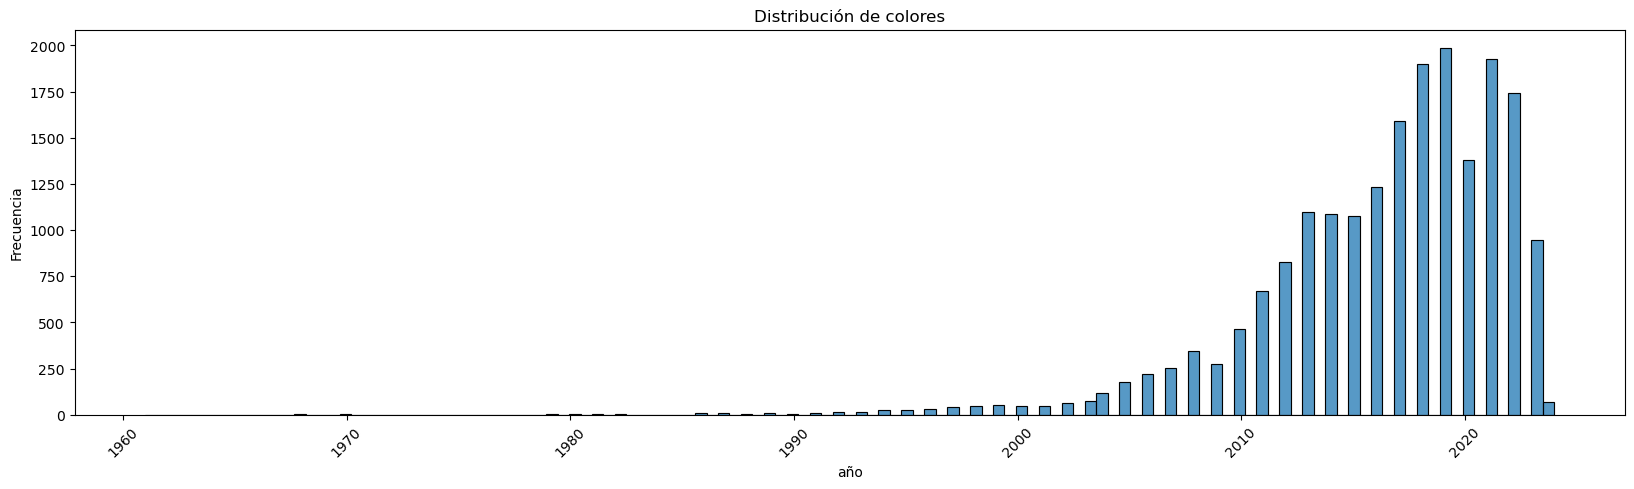

In [160]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
# Añadir etiquetas y título
plt.xlabel('año')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores')

sns.histplot(df['year'])
plt.show()

age

In [161]:
df['age'].describe()

count    19936.00000
mean         7.75000
std          5.55951
min          0.00000
25%          4.00000
50%          7.00000
75%         11.00000
max         63.00000
Name: age, dtype: float64

precio

In [162]:
df['price'].describe()

count    1.993600e+04
mean     9.955412e+08
std      9.865529e+09
min     -1.000000e+00
25%      6.800000e+06
50%      1.000000e+07
75%      1.539000e+07
max      1.000000e+11
Name: price, dtype: float64

In [163]:
df[df['price']<0]

,make_id,model_id,year,cylinder_capacity,km,color,region,price,fuel_type_id,transmission_id,traction_id,age
20,13,201.0,2024,1200.0,1500,Desconocido,OHiggins,-1,0,0,0.0,0
62,4,53.0,2013,1800.0,140000,Desconocido,Metropolitana de Santiago,-1,0,1,0.0,11
76,19,5603.0,2018,1300.0,80000,Desconocido,Metropolitana de Santiago,-1,0,0,0.0,6
135,10,5882.0,2022,1500.0,45000,Desconocido,OHiggins,-1,0,0,0.0,2
451,60,1721.0,2020,2000.0,26350,Azul,Araucanía,-1,0,1,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
19614,42,542.0,2014,2000.0,104000,Gris,Los Lagos,-1,0,1,0.0,10
19695,45,599.0,2018,3000.0,104000,Plata,Metropolitana de Santiago,-1,0,1,0.0,6
19785,202,5643.0,2023,1800.0,16400,Desconocido,V Valparaíso,-1,0,0,Desconocido,1
19860,64,780.0,2006,1800.0,166000,Desconocido,Los Ríos,-1,0,0,Desconocido,18


In [164]:

df = df.drop(df[df['price']>1.000e+10].index)


In [165]:
forma_final=df.shape[0]

In [166]:
forma_final/forma_incial

0.9870493524676234

Conservamos casi todos los datos !

# Eda

Text(0.5, 0, 'Año')

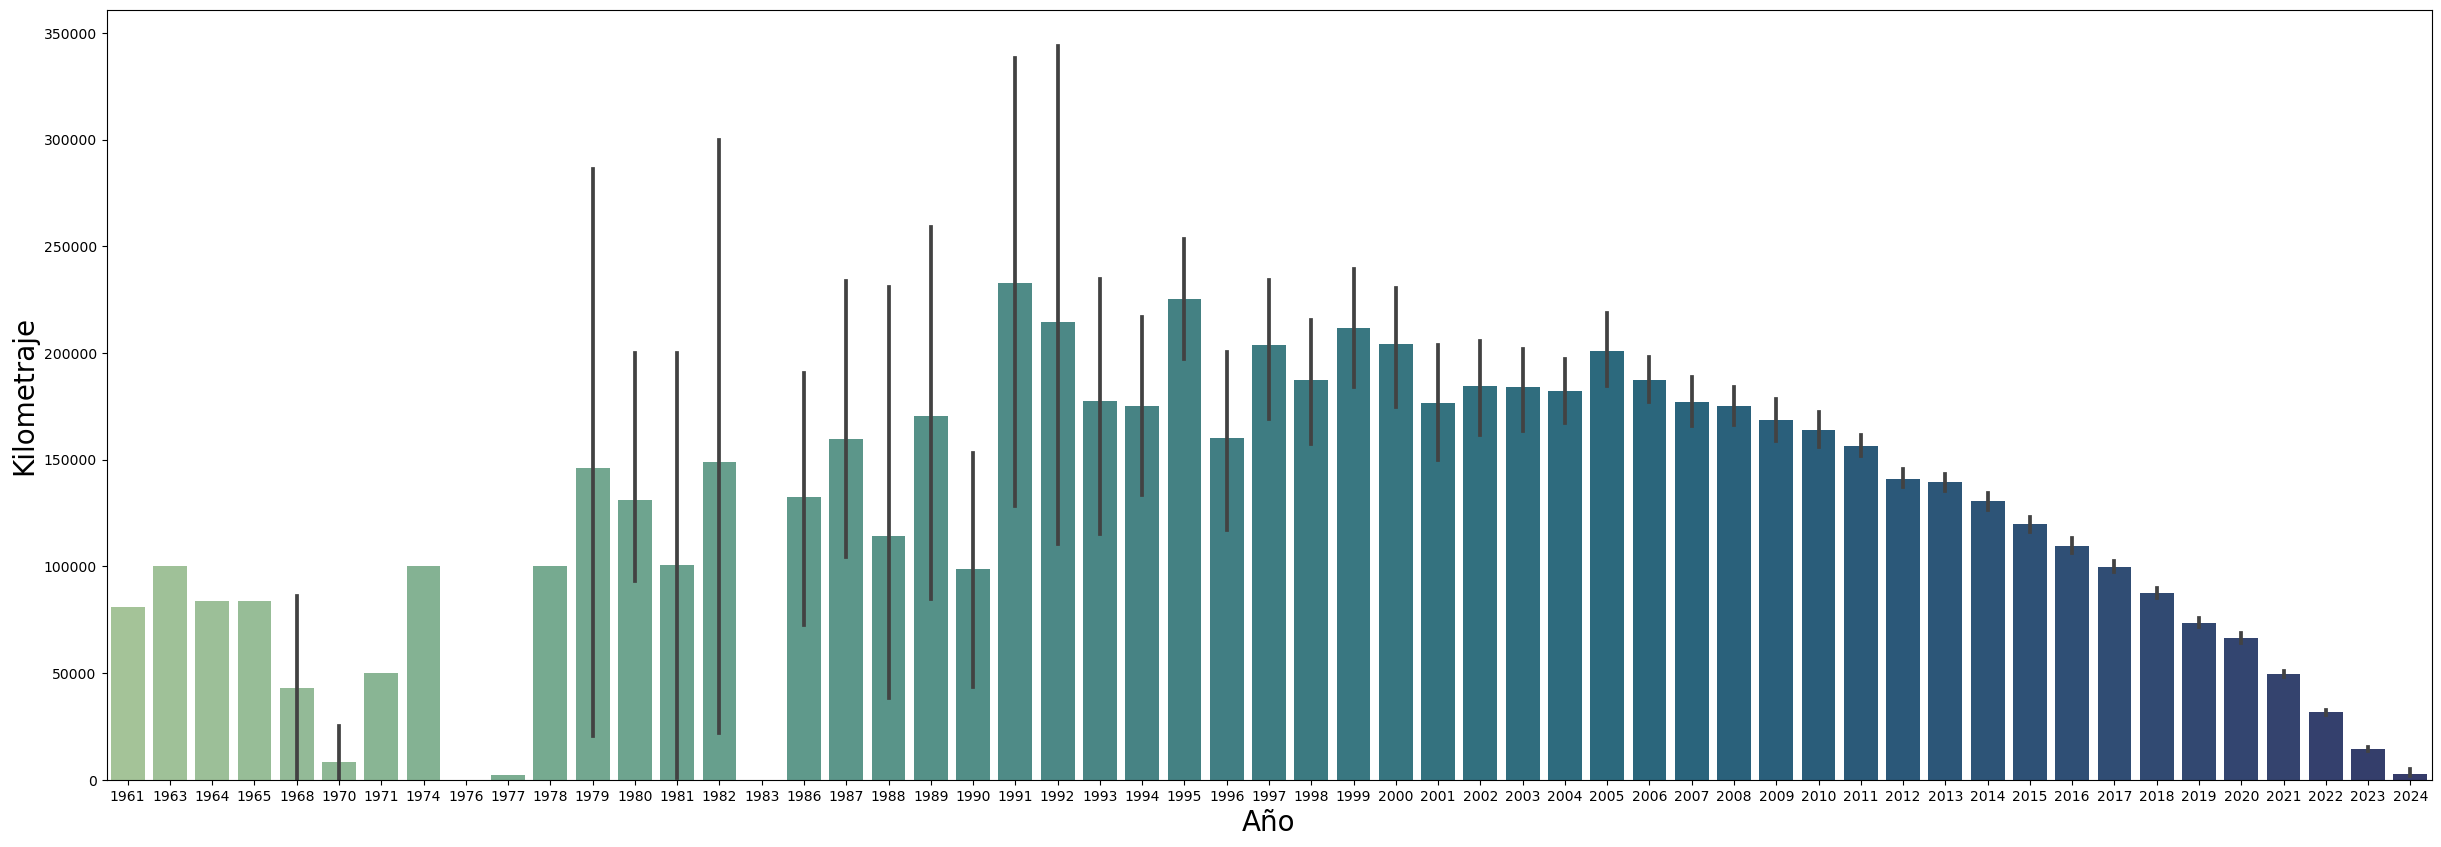

In [167]:
plt.figure( figsize = (30,10))
sns.barplot(data=df,y='km',x='year',palette='crest')

plt.ylabel('Kilometraje',fontsize=20)
plt.xlabel('Año',fontsize=20)

Text(0.5, 0, 'Año')

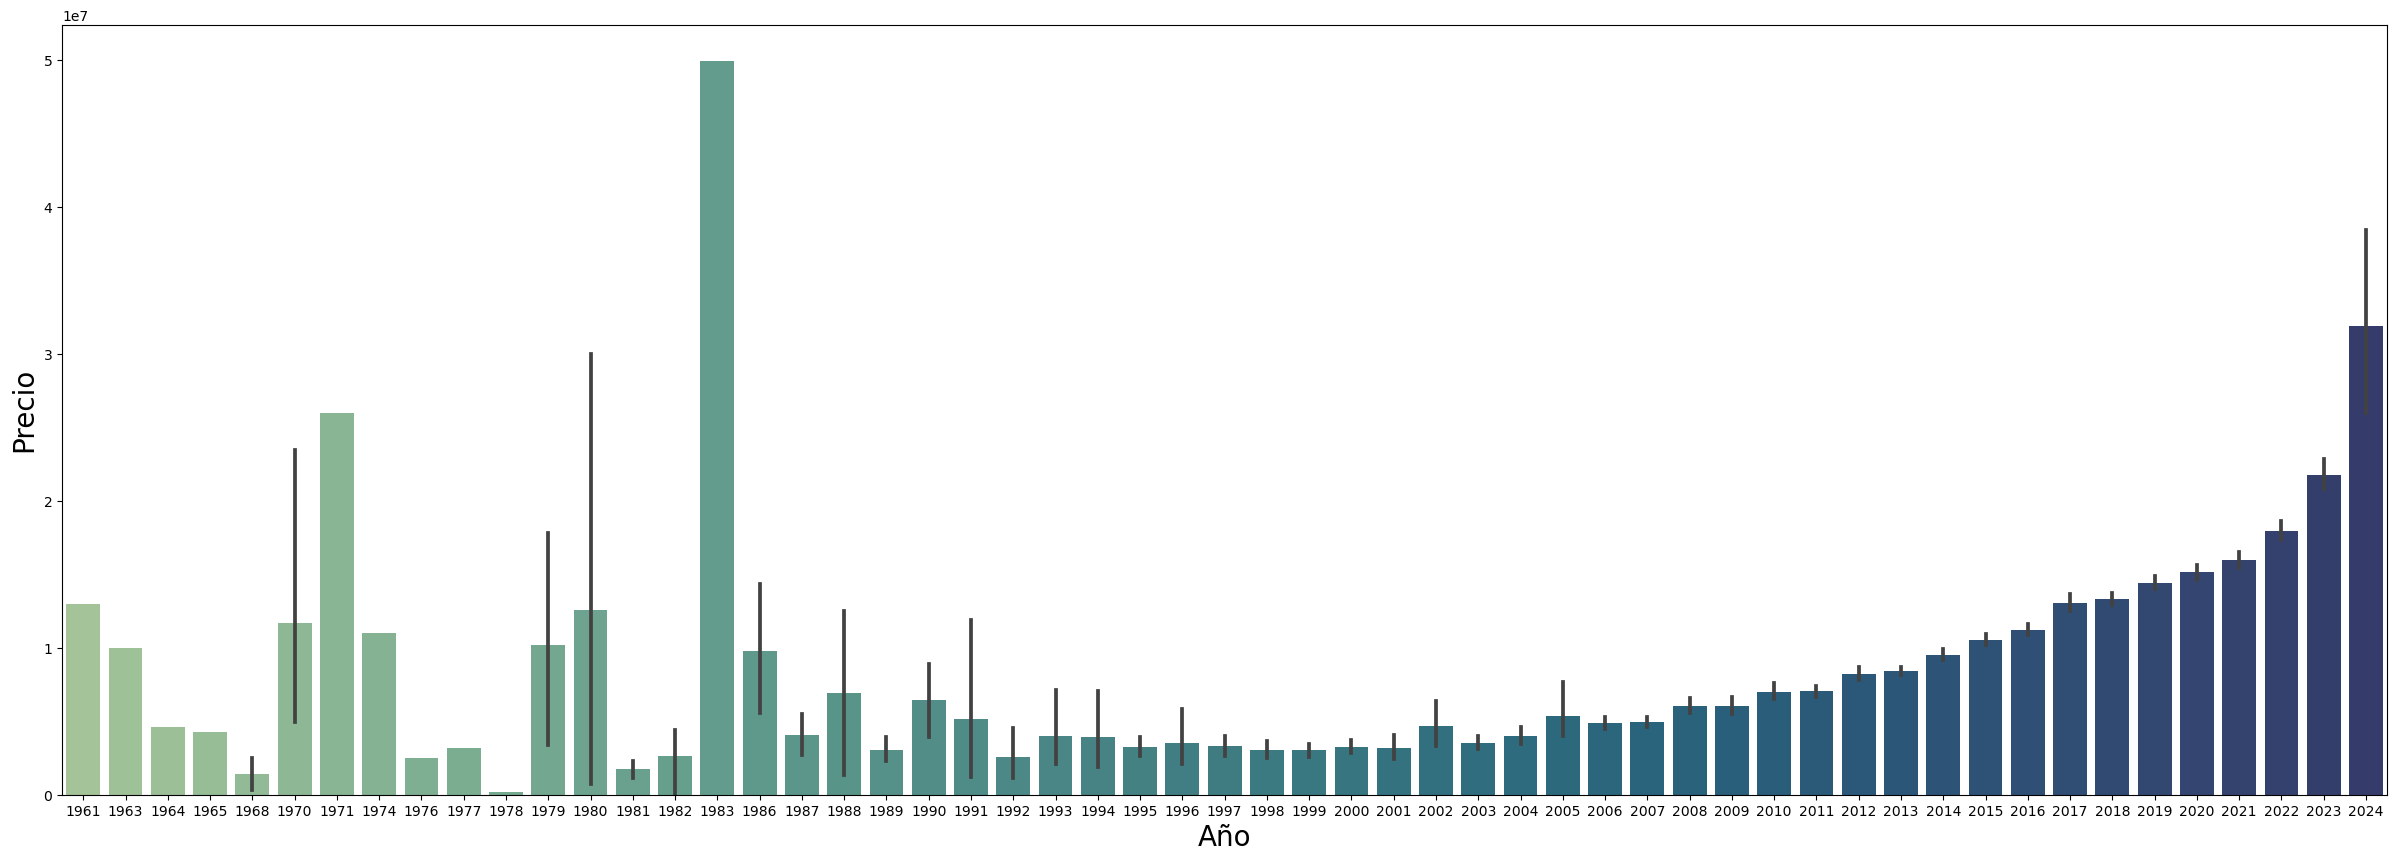

In [168]:
plt.figure( figsize = (30,10))
sns.barplot(data=df,y='price',x='year',palette='crest')

plt.ylabel('Precio',fontsize=20)
plt.xlabel('Año',fontsize=20)

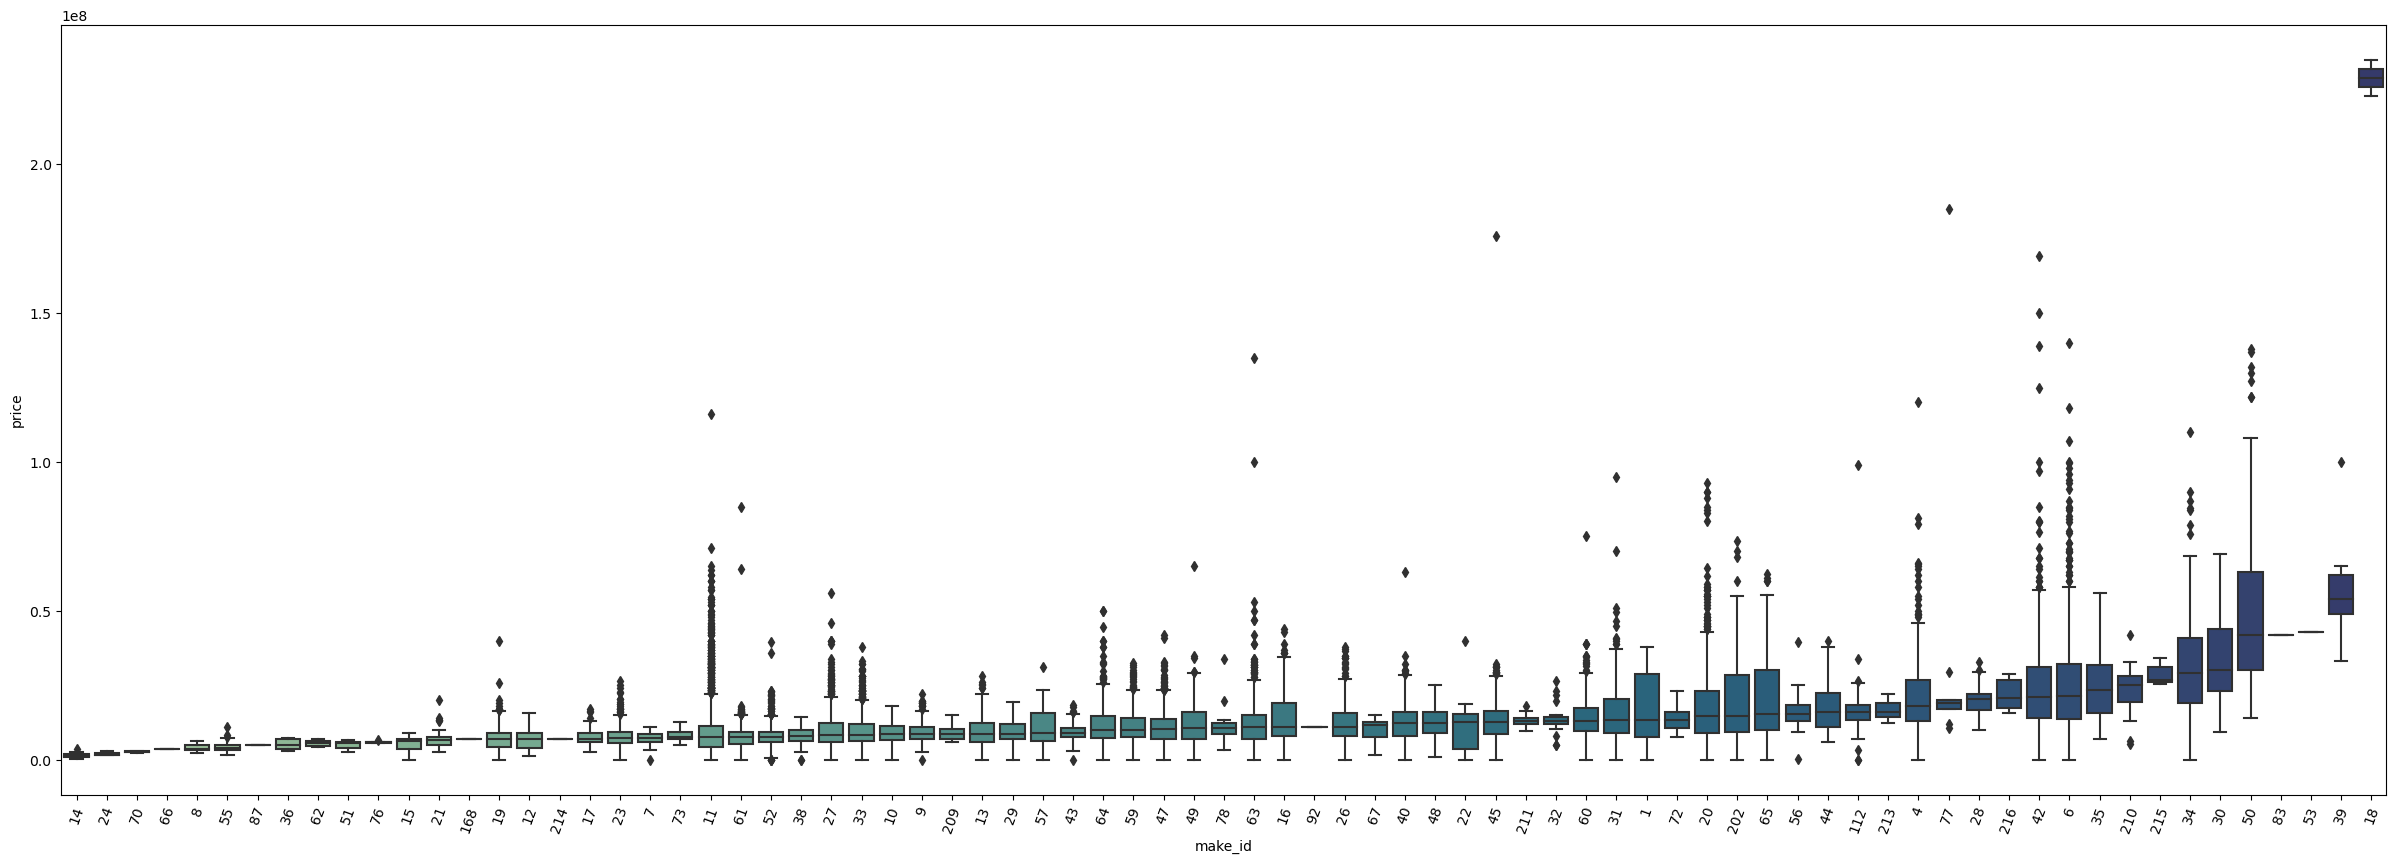

In [169]:
plt.figure(figsize=(30,10))
sorted_nb = df.groupby(['make_id'])['price'].median().sort_values()
sns.boxplot(x=df['make_id'], y=df['price'], order=list(sorted_nb.index),palette='crest')
plt.xticks(rotation=70);

Text(0.5, 0, 'fuel')

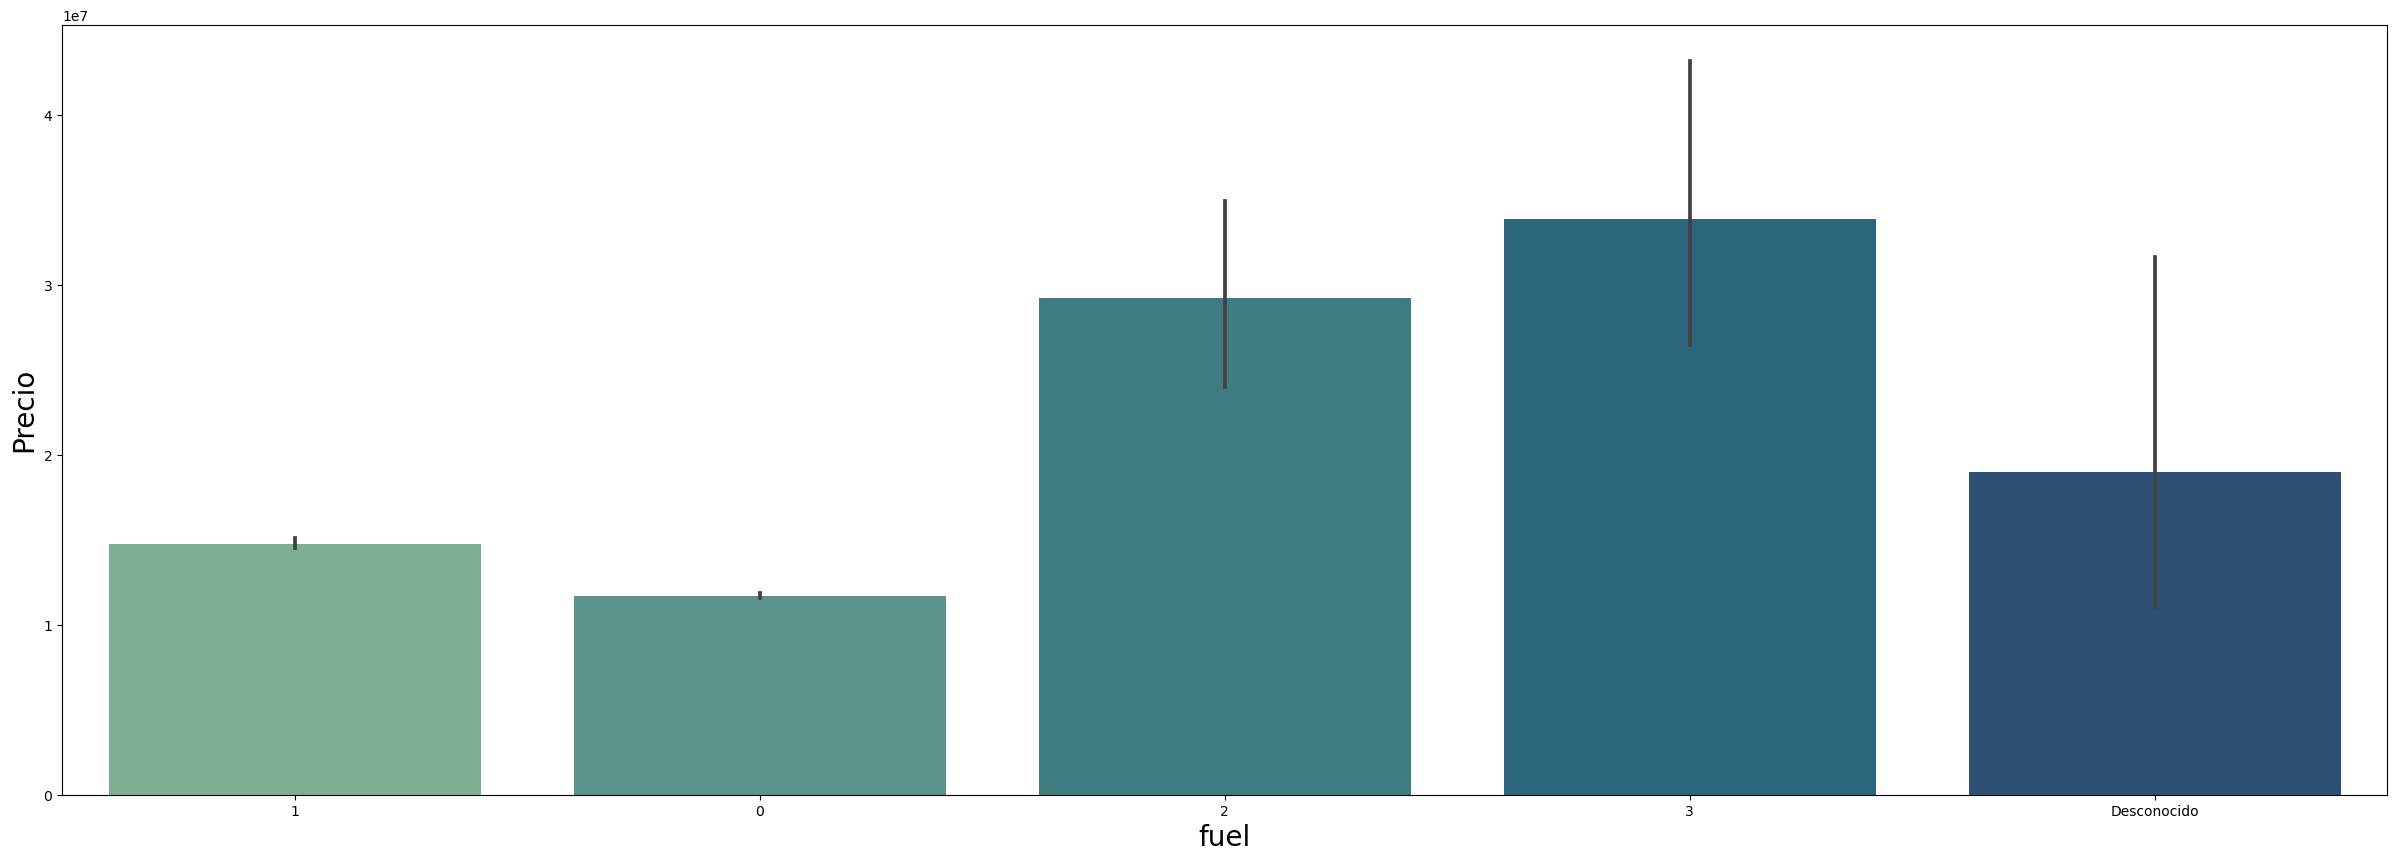

In [170]:
plt.figure( figsize = (30,10))
sns.barplot(data=df,y='price',x='fuel_type_id',palette='crest')

plt.ylabel('Precio',fontsize=20)
plt.xlabel('fuel',fontsize=20)

Text(0.5, 0, 'fuel')

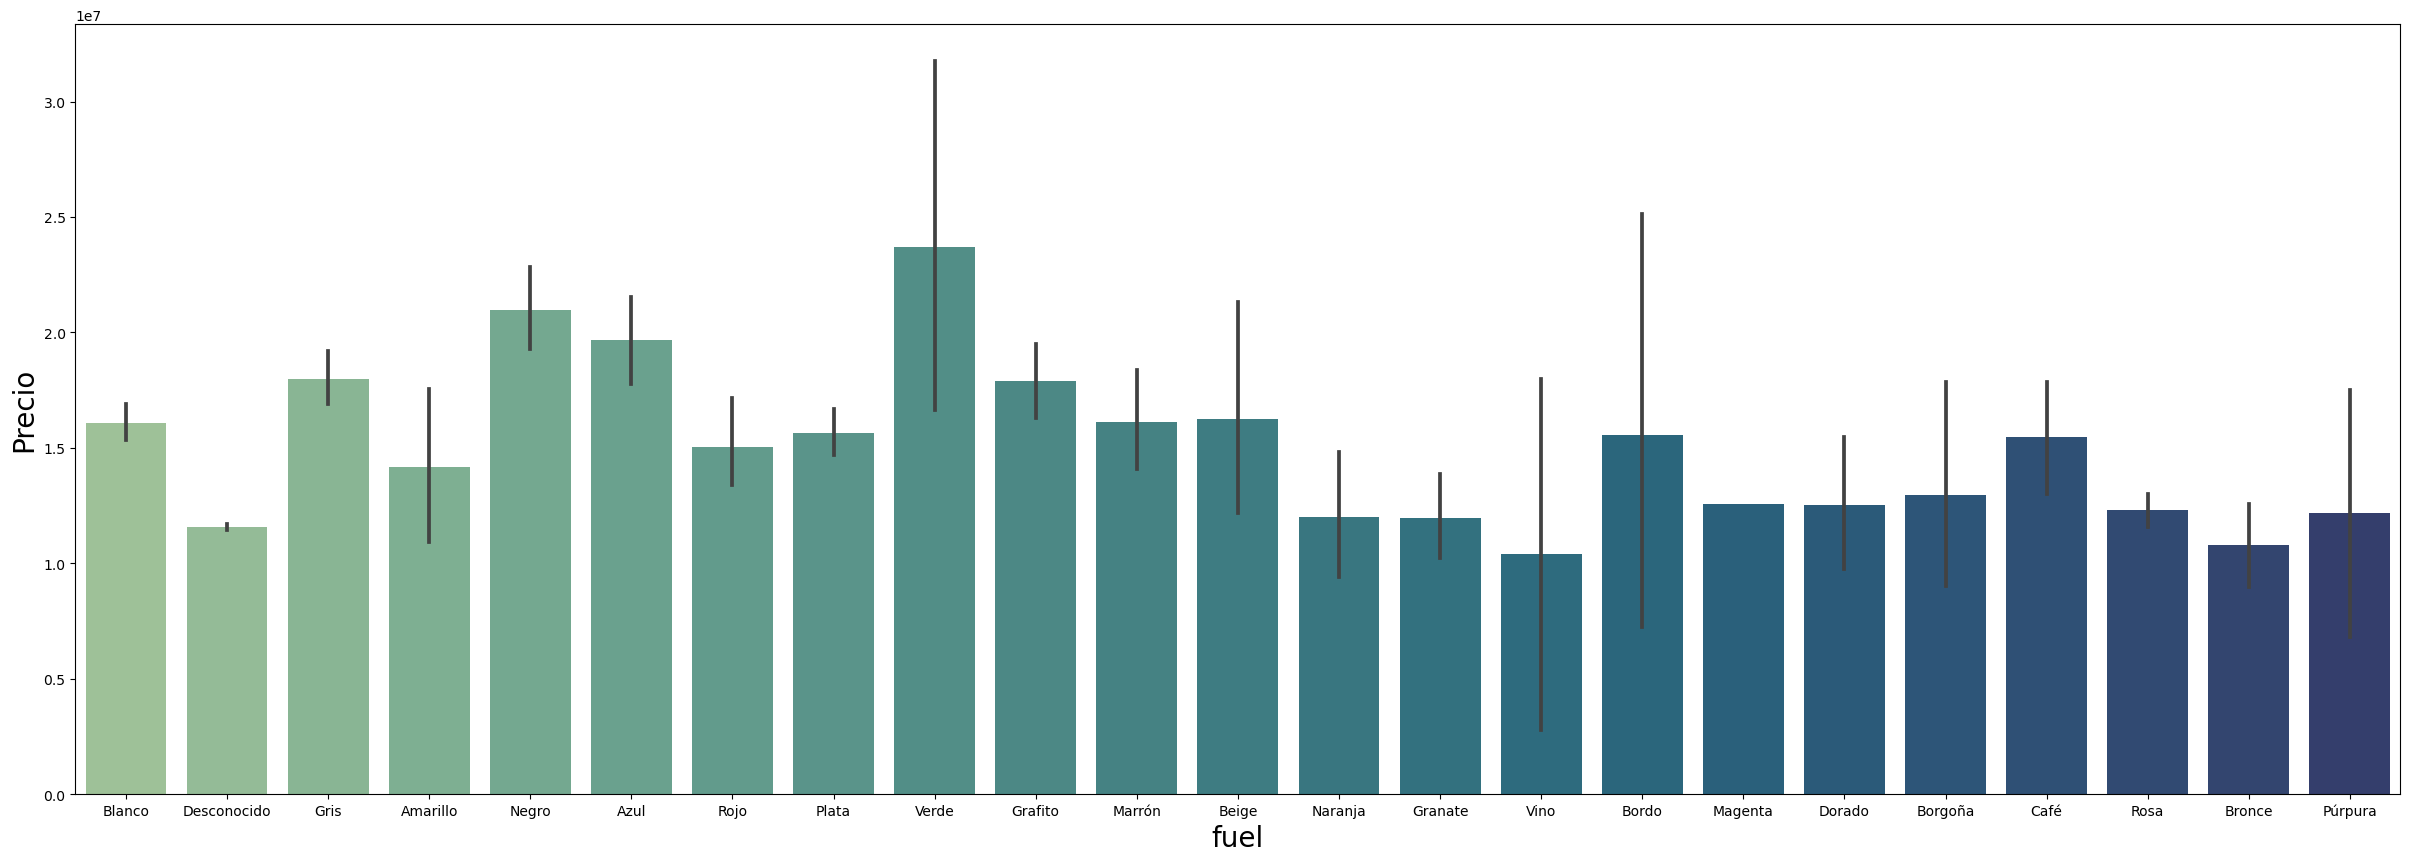

In [171]:
plt.figure( figsize = (30,10))
sns.barplot(data=df,y='price',x='color',palette='crest')

plt.ylabel('Precio',fontsize=20)
plt.xlabel('fuel',fontsize=20)

Text(0.5, 0, 'transmition')

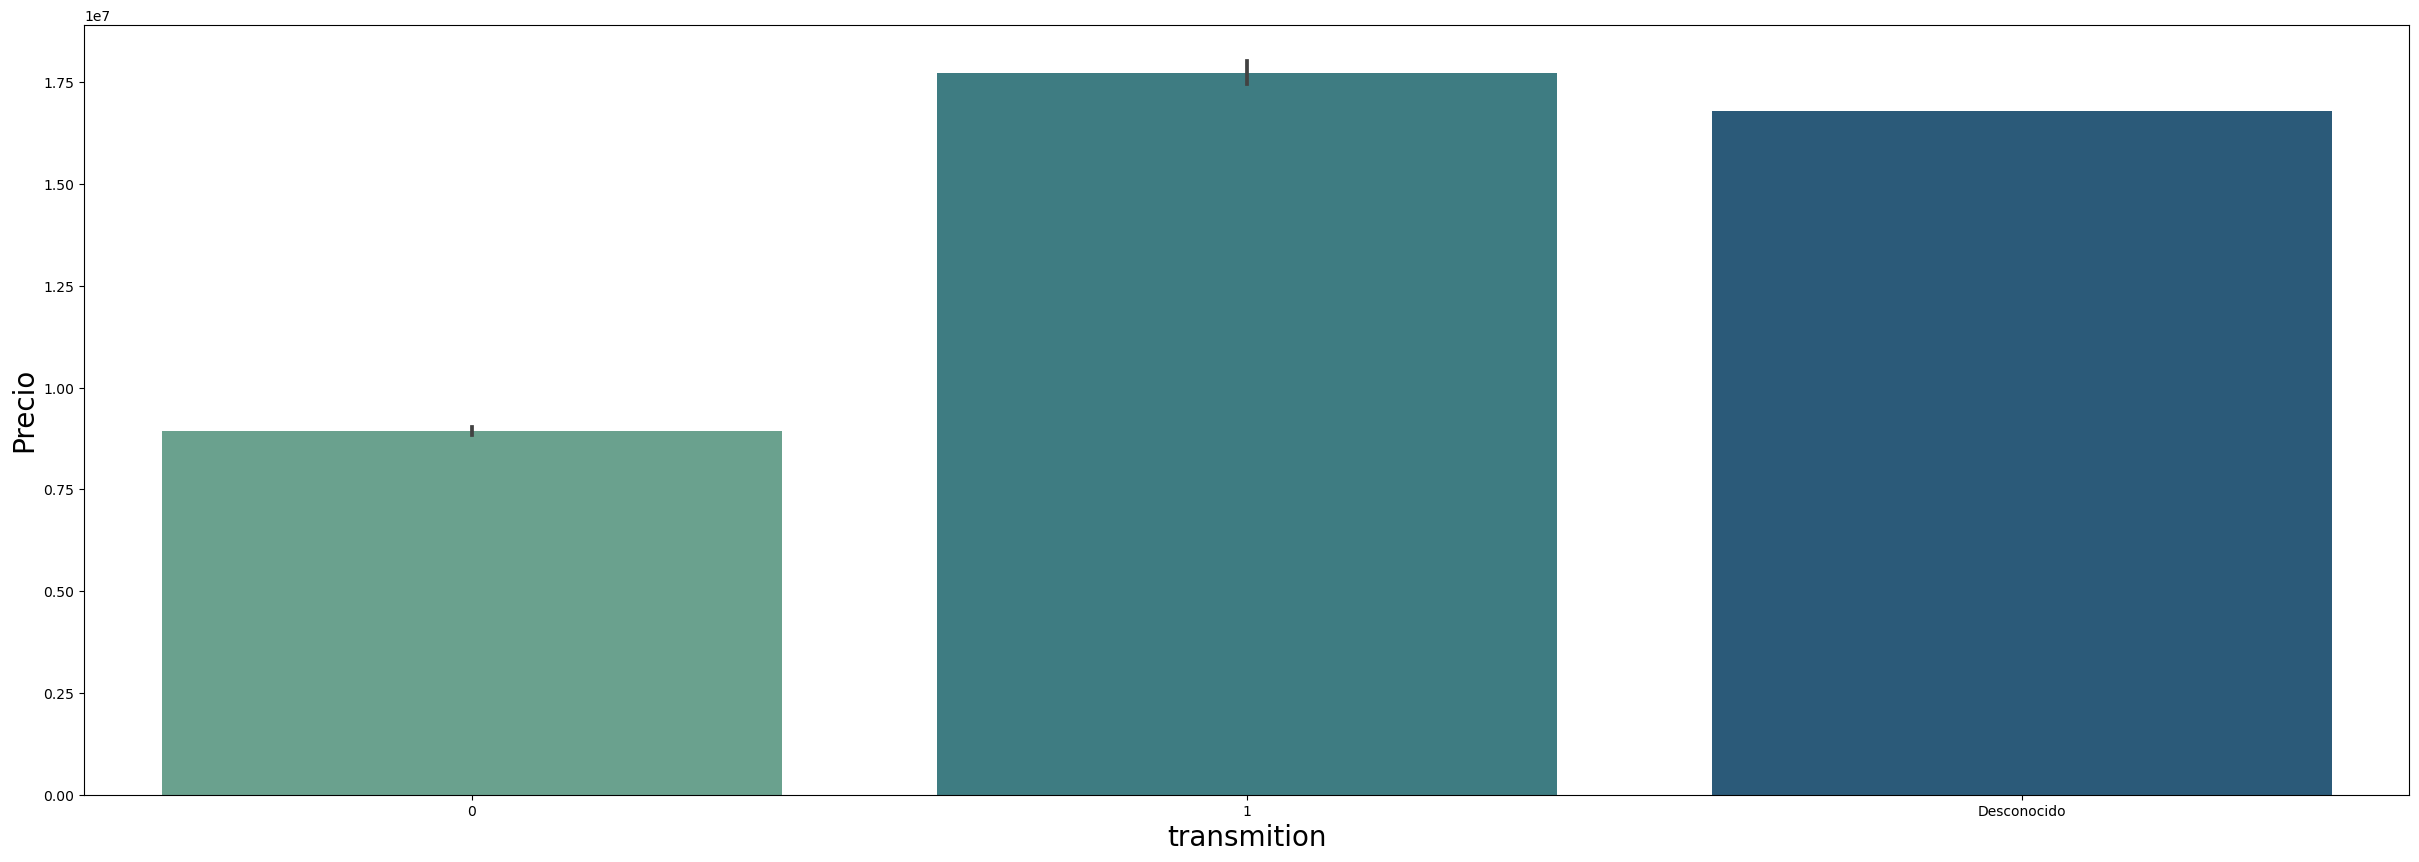

In [172]:
plt.figure( figsize = (30,10))
sns.barplot(data=df,y='price',x='transmission_id',palette='crest')

plt.ylabel('Precio',fontsize=20)
plt.xlabel('transmition',fontsize=20)

C:\Users\FranciscoSepulveda\AppData\Local\Temp\ipykernel_7136\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

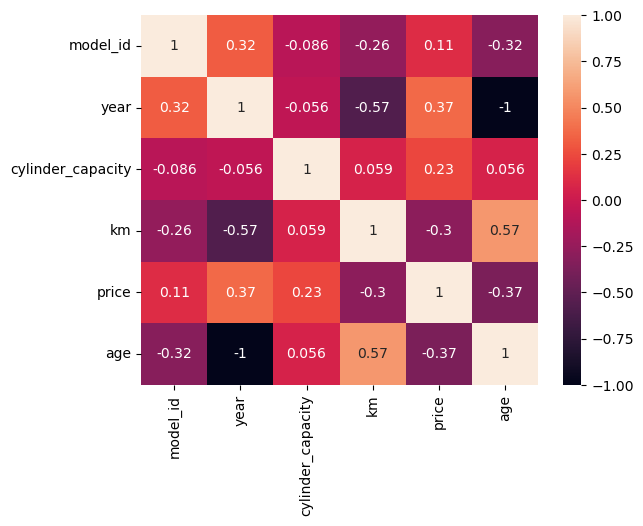

In [173]:
sns.heatmap(df.corr(),annot=True)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19740 entries, 0 to 19998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make_id            19740 non-null  object 
 1   model_id           19740 non-null  float64
 2   year               19740 non-null  int64  
 3   cylinder_capacity  19740 non-null  float64
 4   km                 19740 non-null  int64  
 5   color              19740 non-null  object 
 6   region             19740 non-null  object 
 7   price              19740 non-null  int64  
 8   fuel_type_id       19740 non-null  object 
 9   transmission_id    19740 non-null  object 
 10  traction_id        19740 non-null  object 
 11  age                19740 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 2.0+ MB


In [175]:
df['make_id'] = df['make_id'].astype(object)
df['model_id'] = df['model_id'].astype(object)



# Modelado


In [176]:

std=StandardScaler()
ohe=OneHotEncoder(drop_last=True)

In [177]:
prep_pipe=Pipeline(steps=[
('ohe',OneHotEncoder(drop_last=True)),
('std',SklearnTransformerWrapper(StandardScaler(),variables=['cylinder_capacity','year','km','age','price']))



])

In [178]:
df_escaled=prep_pipe.fit_transform(df)

In [179]:
y=df_escaled.price
X=df_escaled.drop(columns='price')
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [180]:
pipe_ada=Pipeline(steps=[
#('prep',prep_pipe),
('model',AdaBoostRegressor(random_state=123))
]) 
# n_estimators=100 muy complejop 
params={'model__n_estimators':[1,10],
'model__learning_rate':[0.01,0.1]}
search_ada=GridSearchCV(pipe_ada,params,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)

In [181]:
search_ada.fit(X_train,y_train)
best_model_ada=search_ada.best_estimator_

In [182]:
best_model_ada.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('model',
                 AdaBoostRegressor(learning_rate=0.01, n_estimators=10,
                                   random_state=123))])>

In [183]:
pd.DataFrame(search_ada.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.334732,0.010530,0.044076,0.005463,0.01,1,"{'model__learning_rate': 0.01, 'model__n_estim...",-0.877964,-0.880700,-0.823622,-0.742809,-0.762457,-0.817510,0.057090,3
1,12.397066,0.376333,0.188494,0.029846,0.01,10,"{'model__learning_rate': 0.01, 'model__n_estim...",-0.880845,-0.869894,-0.814482,-0.730978,-0.753416,-0.809923,0.060121,1
2,1.319307,0.013861,0.051584,0.006363,0.1,1,"{'model__learning_rate': 0.1, 'model__n_estima...",-0.877964,-0.880700,-0.823622,-0.742809,-0.762457,-0.817510,0.057090,3
3,10.805518,1.975125,0.123295,0.025178,0.1,10,"{'model__learning_rate': 0.1, 'model__n_estima...",-0.880597,-0.866172,-0.823485,-0.742503,-0.755237,-0.813599,0.056234,2


In [184]:
Error_ada=np.sqrt(-search_ada.best_score_)
Error_ada

0.8999573261413537

In [185]:
y_pred_ada=best_model_ada.predict(X_test)

In [186]:
r2_ada=r2_score(y_test,y_pred_ada)
rmse_ada=np.sqrt(mean_squared_error(y_test,y_pred_ada))
print ("RSME",rmse_ada,"r2",r2_ada)


RSME 0.7349283316986868 r2 0.4210006984429362


Xboosting

In [187]:

pipe_xgboosting=Pipeline(steps=[
#('prep',prep_pipe),
('model',XGBRegressor(random_state=123))
]) 
# n_estimators=100 muy complejop 
params={'model__n_estimators':[1,2,10],
'model__learning_rate':[0.01,0.1,0.5]}
search_xgboost=GridSearchCV(pipe_xgboosting,params,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)

In [188]:
search_xgboost.fit(X_train,y_train)
best_model_xgboost=search_xgboost.best_estimator_

In [189]:
pd.DataFrame(search_xgboost.cv_results_)
Error_xgboost=np.sqrt(-search_xgboost.best_score_)
Error_xgboost


0.7531417351733192

In [190]:
y_pred_xgboost=best_model_xgboost.predict(X_test)

In [191]:
r2_xgboost=r2_score(y_test,y_pred_xgboost)
rmse_xgboost=np.square(mean_squared_error(y_test,y_pred_xgboost))
print ("RSME",rmse_xgboost,"r2",r2_xgboost)

RSME 0.093745929961245 r2 0.6717805821135602


In [192]:
y_pred_xgboost

array([-0.33611616, -0.45113304,  0.41009164, ..., -0.37306303,
        0.87842274,  0.07258558], dtype=float32)

In [193]:
y_test

9373     0.328074
13248   -0.519957
8847     0.327132
7384     1.260908
16036    0.373302
           ...   
18518   -0.048923
1917    -0.332448
15578   -0.190167
13001    1.740516
7604    -0.416309
Name: price, Length: 3948, dtype: float64

Linear model

In [194]:
from sklearn.linear_model import Ridge


# Define el pipeline completo con regresión lineal
pipe_linear = Pipeline(steps=[
    #('prep', prep_pipe),
    ('model', Ridge(random_state=123))  # Utiliza Ridge para regularización
])

# Define los parámetros para GridSearchCV
params = {
    'model__alpha': [0.01, 0.1, 1.0],  # Parámetro de regularización
}

# Realiza la búsqueda grid
search_linear = GridSearchCV(pipe_linear, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


In [195]:
search_linear.fit(X_train, y_train)

# Obtén el mejor modelo
best_model_linear = search_linear.best_estimator_

# Hacer predicciones con el mejor modelo
predictions_linear = best_model_linear.predict(X_test)



In [196]:
# Calcular el RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, predictions_linear))
r2_linear=r2_score(y_test,predictions_linear)
print("RMSE:", rmse_linear,"r2",r2_linear)

RMSE: 0.5327392802175829 r2 0.695759168546961


# Comparacion

In [197]:
print("ADA RSME",rmse_ada)
print("Xgboost RSME",rmse_xgboost)
print("Linear RSME",rmse_linear)


ADA RSME 0.7349283316986868
Xgboost RSME 0.093745929961245
Linear RSME 0.5327392802175829


Xgboost Tiene menor RSme por lo tanto es un mejor modelo para poder predecir los precios 

In [199]:
from joblib import dump, load
dump(best_model_xgboost, 'best_model.joblib') 

['best_model.joblib']